In [2]:
import pandas as pd
import numpy as np
import json
import requests
from pathlib import Path

pd.set_option('display.max_columns', 300)

In [3]:
teams = ['Arsenal', 'Aston Villa', 'Burnley', 'Bournemouth', 'Brentford', 'Brighton', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Leeds United', 'Liverpool', 'Manchester City', 'Manchester Utd', 'Newcastle Utd', 'Nottingham Forest', 'Sunderland', 'Tottenham', 'West Ham', 'Wolves']

In [4]:
# fetch FPL data online
fpl_online_data = json.loads(requests.get('https://fantasy.premierleague.com/api/bootstrap-static/').text)
fpl_online_df = pd.DataFrame(fpl_online_data['elements'])
fpl_online_df['team_name'] = [teams[i] for i in fpl_online_df['team']-1]
fpl_online_df['name'] = fpl_online_df.apply(lambda x: x['first_name'] + ' ' + x['second_name'], axis=1)
fpl_online_df['season'] = '25-26'
fpl_online_df

,can_transact,can_select,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,removed,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,region,team_join_date,birth_date,has_temporary_code,opta_code,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,clearances_blocks_interceptions,recoveries,tackles,defensive_contribution,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text,expected_goals_per_90,saves_per_90,expected_assists_per_90,expected_goal_involvements_per_90,expected_goals_conceded_per_90,goals_conceded_per_90,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90,defensive_contribution_per_90,team_name,name,season
0,True,True,NaN,None,154561,0,0,0,0,0,1,4.5,None,0,David,0.0,1,False,,None,55,154561.jpg,3.7,False,Raya Martín,17.6,False,None,a,1,3,142,0,0,0,0,0.0,25.8,Raya,200.0,2024-07-04,1995-09-15,False,p154561,3420,0,0,13,34,0,0,0,3,0,86,10,555,755.4,10.7,0.0,76.7,0,0,0,0,38,0.00,0.03,0.03,35.03,37,8,342,11,640,79,178,8,NaN,,NaN,,NaN,,0.0,2.26,0.00,0.00,0.92,0.89,129,4,481,79,68,11,23,4,1.00,0.34,0.00,Arsenal,David Raya Martín,25-26
1,True,True,NaN,None,109745,0,0,0,0,0,1,2.8,None,0,Kepa,0.0,2,False,,None,45,109745.jpg,3.4,False,Arrizabalaga Revuelta,1.0,False,None,a,1,3,106,0,0,0,0,0.0,23.6,Arrizabalaga,200.0,2025-07-01,1994-10-03,False,p109745,2790,0,0,8,39,0,0,0,3,0,97,7,406,744.4,10.4,4.0,75.8,0,0,0,0,31,0.06,0.03,0.09,38.83,38,9,344,12,333,1,183,9,NaN,,NaN,,NaN,,0.0,3.13,0.00,0.00,1.25,1.26,372,22,144,51,94,16,195,28,1.00,0.26,0.00,Arsenal,Kepa Arrizabalaga Revuelta,25-26
2,True,True,NaN,None,463748,0,0,0,0,0,1,1.5,None,0,Karl,0.0,3,False,,None,40,463748.jpg,0.0,False,Hein,0.6,False,None,a,1,3,0,0,0,0,0,0.0,0.0,Hein,67.0,2020-10-28,2002-04-13,False,p463748,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.00,0.00,0.00,0.00,437,55,427,46,396,31,437,55,NaN,,NaN,,NaN,,0.0,0.00,0.00,0.00,0.00,0.00,610,63,58,29,440,55,247,32,0.00,0.00,0.00,Arsenal,Karl Hein,25-26
3,True,True,NaN,None,551221,0,0,0,0,0,1,1.5,None,0,Tommy,0.0,4,False,,None,40,551221.jpg,0.0,False,Setford,0.2,False,None,a,1,3,0,0,0,0,0,0.0,0.0,Setford,241.0,2024-07-24,2006-03-13,False,p551221,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.00,0.00,0.00,0.00,471,66,462,57,436,44,471,66,NaN,,NaN,,NaN,,0.0,0.00,0.00,0.00,0.00,0.00,653,76,101,42,474,66,452,61,0.00,0.00,0.00,Arsenal,Tommy Setford,25-26
4,True,True,NaN,None,226597,0,0,0,0,0,2,4.5,None,0,Gabriel,0.0,5,False,,None,60,226597.jpg,4.2,False,dos Santos Magalhães,21.2,False,None,a,1,3,117,0,0,0,0,0.0,19.5,Gabriel,30.0,2020-09-01,1997-12-19,False,p226597,2363,3,2,10,22,0,0,0,4,0,0,9,459,584.6,208.8,287.0,108.2,0,0,0,159,28,2.70,1.21,3.91,23.09,96,32,167,36,107,12,121,31,NaN,,NaN,,NaN,,0.1,0.00,0.05,0.15,0.88,0.84,98,5,584,219,32,1,16,6,1.07,0.38,6.06,Arsenal,Gabriel dos Santos Magalhães,25-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [5]:
for team_name in teams:
    print(team_name)
    print(fpl_online_df[fpl_online_df.team_name==team_name].name.unique())
    print()

Arsenal
['David Raya Martín' 'Kepa Arrizabalaga Revuelta' 'Karl Hein'
 'Tommy Setford' 'Gabriel dos Santos Magalhães' 'William Saliba'
 'Riccardo Calafiori' 'Jurriën Timber' 'Jakub Kiwior' 'Myles Lewis-Skelly'
 'Benjamin White' 'Oleksandr Zinchenko' 'Brayden Clarke' 'Maldini Kacurri'
 'Josh Nichols' 'Bukayo Saka' 'Martin Ødegaard' 'Noni Madueke'
 'Gabriel Martinelli Silva' 'Leandro Trossard' 'Declan Rice'
 'Mikel Merino Zazón' 'Fábio Ferreira Vieira' 'Christian Nørgaard'
 'Ethan Nwaneri' 'Martín Zubimendi Ibáñez' 'Reiss Nelson' 'Ismeal Kabia'
 'Albert Sambi Lokonga' 'Kai Havertz' 'Gabriel Fernando de Jesus'
 'Cristhian Mosquera' 'Viktor Gyökeres']

Aston Villa
['Emiliano Martínez Romero' 'Marco Bizot' 'Joe Gauci' 'Filip Marschall'
 'Matty Cash' 'Lucas Digne' 'Ezri Konsa Ngoyo' 'Ian Maatsen'
 'Tyrone Mings' 'Pau Torres' 'Andrés García' 'Álex Moreno Lopera'
 'Lamare Bogarde' 'Lino da Cruz Sousa' 'Yasin Özcan' 'Morgan Rogers'
 'Youri Tielemans' 'Leon Bailey' 'Emiliano Buendía Stati'
 'Sam

<Axes: ylabel='Frequency'>

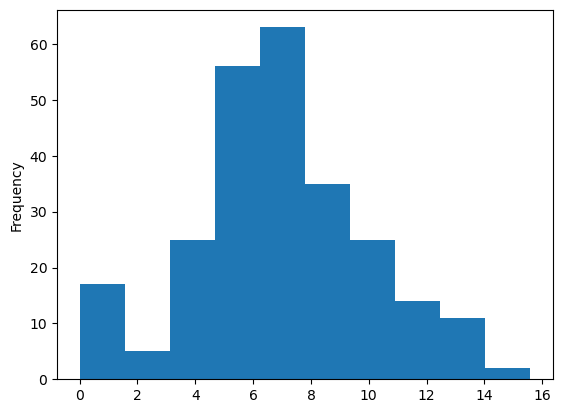

In [10]:
fpl_online_df.loc[fpl_online_df.minutes>900, 'defensive_contribution_per_90'].plot(kind='hist')

In [11]:
fpl_online_df.loc[fpl_online_df.minutes>900].sort_values(by='defensive_contribution_per_90', ascending=False).head(20)[['name', 'minutes', 'team_name', 'defensive_contribution_per_90']]


,name,minutes,team_name,defensive_contribution_per_90
467,Carlos Henrique Casimiro,1489,Manchester Utd,15.59
213,Mats Wieffer,1003,Brighton,15.25
128,Ryan Christie,2114,Bournemouth,13.88
599,Rodrigo Bentancur,1640,Tottenham,13.50
528,Nicolás Domínguez,1954,Nottingham Forest,13.50
169,Yehor Yarmoliuk,1435,Brentford,13.48
526,Elliot Anderson,2726,Nottingham Forest,13.44
660,André Trindade da Costa Neto,2472,Wolves,13.07
273,Jefferson Lerma Solís,2270,Crystal Palace,12.96
23,Christian Nørgaard,2820,Arsenal,12.93


In [ ]:
display(fpl_online_df.loc[(fpl_online_df.minutes>900) & 
                  (fpl_online_df.defensive_contribution_per_90>9) & 
                (fpl_online_df.element_type==2), 
                ['id','name', 'team_name', 'minutes', 'now_cost', 'defensive_contribution_per_90']].sort_values(by='defensive_contribution_per_90', ascending=False))

def_contribution_ids = fpl_online_df.loc[(fpl_online_df.minutes>900) & 
                  (fpl_online_df.defensive_contribution_per_90>10) & 
                (fpl_online_df.element_type==2), 
                ['id','name', 'team_name', 'minutes', 'defensive_contribution_per_90']].id.tolist()
print('IDs:')
display(def_contribution_ids)

,id,name,team_name,minutes,now_cost,defensive_contribution_per_90
293,291,James Tarkowski,Everton,2922,55,10.97
515,506,Murillo Costa dos Santos,Nottingham Forest,3188,55,10.61
152,111,Ethan Pinnock,Brentford,1912,45,10.17
258,257,Maxence Lacroix,Crystal Palace,3116,50,10.02
292,290,Jarrad Branthwaite,Everton,2509,55,9.83
113,72,Marcos Senesi Barón,Bournemouth,1103,45,9.63
621,606,Konstantinos Mavropanos,West Ham,2035,45,9.55
320,317,Joachim Andersen,Fulham,2673,45,9.53
147,106,Nathan Collins,Brentford,3420,50,9.24
648,631,Emmanuel Agbadou,Wolves,1410,45,9.19


IDs:


[111, 257, 291, 506]

In [25]:
display(fpl_online_df.loc[(fpl_online_df.minutes>900) & 
                  (fpl_online_df.defensive_contribution_per_90>11) & 
                (fpl_online_df.element_type==3), 
                ['id','name', 'team_name', 'minutes', 'now_cost', 'defensive_contribution_per_90']].sort_values(by='defensive_contribution_per_90', ascending=False))

def_contribution_ids.extend(fpl_online_df.loc[(fpl_online_df.minutes>900) & 
                  (fpl_online_df.defensive_contribution_per_90>12) & 
                (fpl_online_df.element_type==3), 
                ['id','name', 'team_name', 'minutes', 'defensive_contribution_per_90']].id.tolist())
print('IDs:')
display(np.array(def_contribution_ids))

,id,name,team_name,minutes,now_cost,defensive_contribution_per_90
467,457,Carlos Henrique Casimiro,Manchester Utd,1489,55,15.59
213,173,Mats Wieffer,Brighton,1003,50,15.25
128,87,Ryan Christie,Bournemouth,2114,50,13.88
599,585,Rodrigo Bentancur,Tottenham,1640,55,13.50
528,519,Nicolás Domínguez,Nottingham Forest,1954,50,13.50
169,129,Yehor Yarmoliuk,Brentford,1435,50,13.48
526,517,Elliot Anderson,Nottingham Forest,2726,55,13.44
660,643,André Trindade da Costa Neto,Wolves,2472,55,13.07
273,272,Jefferson Lerma Solís,Crystal Palace,2270,50,12.96
23,24,Christian Nørgaard,Arsenal,2820,55,12.93


IDs:


array([111, 257, 291, 506,  24,  85,  87, 129, 167, 173, 241, 272, 273,
       302, 457, 459, 517, 519, 585, 586, 587, 643])

In [ ]:
# save online data
my_path = Path('../data/fpl_df_preseason_online.csv')
fpl_online_df.to_csv(my_path)

In [ ]:
# fetch old data
my_path = Path('../data/modeling/fpl_df.csv')
fpl_df = pd.read_csv(my_path, index_col=0)
fpl_df 

In [ ]:
fpl_df_latest = fpl_df.groupby(['first_name', 'second_name']).last().reset_index()
fpl_df_latest['name'] = fpl_df_latest.apply(lambda x: x['first_name'] + ' ' + x['second_name'], axis=1)
fpl_df_latest

In [ ]:
fpl_df_latest[fpl_df_latest.name.str.contains('Jesus')]

In [ ]:
fpl_df_latest = fpl_df_latest.drop(405) # drop G.Jesus extra row from man city time

In [ ]:
# only keep players that are found this season
fpl_df_latest = fpl_df_latest[fpl_df_latest['name'].isin(fpl_online_df.name.unique())].reset_index()
fpl_df_latest

In [ ]:
# fix new teams and positions for players who have changed those for this year

correct_teams = []
correct_positions = []
for ix, row in fpl_df_latest.iterrows():
    my_name = row['name']
    my_position = row.element_type
    online_team = fpl_online_df.loc[fpl_online_df.name==my_name, 'team'].item()
    online_position = fpl_online_df.loc[fpl_online_df.name==my_name, 'element_type'].item()
    correct_teams.append(online_team)
    correct_positions.append(online_position)

fpl_df_latest['team'] = correct_teams
fpl_df_latest['team_name'] = [teams[i] for i in fpl_df_latest['team']-1]
fpl_df_latest['element_type'] = correct_positions

fpl_df_latest

In [ ]:
fpl_online_df[fpl_online_df.name.str.contains('Piroe')]

In [ ]:
# save preseason player data
my_path = Path('../data/fpl_df_preseason.csv')
fpl_df_latest.to_csv(my_path)

In [ ]:
# get FPL fixtures data
fpl_fixtures_data = json.loads(requests.get('https://fantasy.premierleague.com/api/fixtures/').text)
fpl_fixtures = pd.DataFrame(fpl_fixtures_data)
fpl_fixtures['home_team'] = [teams[i] for i in fpl_fixtures['team_h']-1]
fpl_fixtures['away_team'] = [teams[i] for i in fpl_fixtures['team_a']-1]
fpl_fixtures

In [ ]:
# save fpl fixtures
my_path = Path('../data/fixtures/fpl_fixtures.csv')
fpl_fixtures.to_csv(my_path)

In [ ]:
# team data, add estimate for new teams
my_path = Path('../data/modeling/team_data.csv')
team_data = pd.read_csv(my_path, index_col=0)
team_data 

In [ ]:
team_data['xG_ewm_5'].plot(kind='hist')

In [ ]:
team_data['xG_ewm_40'].plot(kind='hist')

In [ ]:
team_data['xGA_ewm_5'].plot(kind='hist')

In [ ]:
team_data['xGA_ewm_40'].plot(kind='hist')

In [ ]:
team_data.tail(20)

In [ ]:
[team for team in teams if team not in team_data.value.unique()]

In [ ]:
# add extra row and edit relevant columns to add necessary team data
#team_data = pd.concat((team_data, pd.DataFrame(team_data.iloc[-1]).T)).reset_index(drop=True)

In [ ]:
new_row = pd.DataFrame(
    data=np.array(['Sunderland', 1, 1, 1, 1, 1.8, 1.8, 1.8, 1.8,]).reshape(1,9), 
    index=[0],
    columns=['value','xG_ewm_5', 'xG_ewm_10', 'xG_ewm_20', 'xG_ewm_40', 'xGA_ewm_5', 'xGA_ewm_10', 'xGA_ewm_20', 'xGA_ewm_40']
)
new_row

In [ ]:
team_data = pd.concat((team_data, new_row), ignore_index=True)
team_data

In [ ]:
# save pre-season team data
my_path = Path('../data/team_data_preseason.csv')
team_data.to_csv(my_path)